<a href="https://colab.research.google.com/github/Lafri-13/Adult-Census-Income-Classification/blob/main/CM2604_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [505]:
!pip install ucimlrepo

# Description of Dataset

In [506]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [507]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [508]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


### Merging X and y together to handle null values together

In [509]:
X["income"] = y

In [510]:
X_data = X.copy()

### Replace the string without the fullstops

In [511]:
X_data['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [512]:
X_data.loc[:, 'income'].replace('<=50K.','<=50K', regex=True, inplace=True)
X_data.loc[:, 'income'].replace('>50K.','>50K', regex=True, inplace=True)

In [513]:
X_data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [514]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [515]:
X_data.shape

(48842, 15)

In [516]:
X_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking and Forward Filling Null Values

In [517]:
X_data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [518]:
X_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [519]:
X_data.eq("?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Changing '?' to NaN and

In [520]:
import numpy as np
X_data.replace('?', np.NaN, inplace=True)

In [521]:
X_data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [522]:
X_data.shape

(48842, 15)

Forward filling will fill the NaN values with the last obsereved non missing value

In [523]:
def forward_fill():
  X_data.fillna(method = 'ffill', inplace=True)

def drop_null():
  X_data.dropna(inplace=True)

def add_mode():
  X_data.fillna(X_data.mode().iloc[0], inplace=True)

In [524]:
def handle_NaN():
    print("Type FF to Forward fill the NaN Values")
    print("Type D to Drop the NaN Values")
    print("Type M to Add the median to the NaN Values")
    user_input = input("Enter the way to handle NaN value : ")

    if user_input.lower() == "ff":
        forward_fill()
    elif user_input.lower() == "d":
        drop_null()
    elif user_input.lower() == "m":
        add_mode()
    else:
        print("Invalid input")
        handle_NaN()

handle_NaN()


Type FF to Forward fill the NaN Values
Type D to Drop the NaN Values
Type M to Add the median to the NaN Values
Enter the way to handle NaN value : m


In [525]:
X_data.shape

(48842, 15)

In [526]:
X_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Finding Duplicates and removing it

In [527]:
X_data['All-Columns'] = X_data['age'].astype(str) + X_data['workclass'] + X_data['fnlwgt'].astype(str) + X_data['education'] + X_data['education-num'].astype(str) + X_data['marital-status'] + X_data['occupation'] + X_data['relationship'] + X_data['race'] + X_data['sex'] + X_data['capital-gain'].astype(str) + X_data['capital-loss'].astype(str) + X_data['hours-per-week'].astype(str) + X_data['native-country'] + X_data['income']

In [528]:
duplicates = X_data[X_data.duplicated('All-Columns')]

print("Duplicates in column 'All-Columns':")
print(duplicates)

Duplicates in column 'All-Columns':
       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2  

In [529]:
X_data.shape

(48842, 16)

In [530]:
X_data = X_data.drop_duplicates('All-Columns')

In [531]:
X_data.shape

(48789, 16)

In [532]:
duplicates = X_data[X_data.duplicated('All-Columns')]

print("Duplicates in column 'All-Columns':")
print(duplicates)

Duplicates in column 'All-Columns':
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income, All-Columns]
Index: []


In [533]:
X_data = X_data.drop('All-Columns', axis=1)

In [534]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Checking Outliers


In [535]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [536]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

X_data.shape

(48789, 15)

### Finding outliers for Age and droping

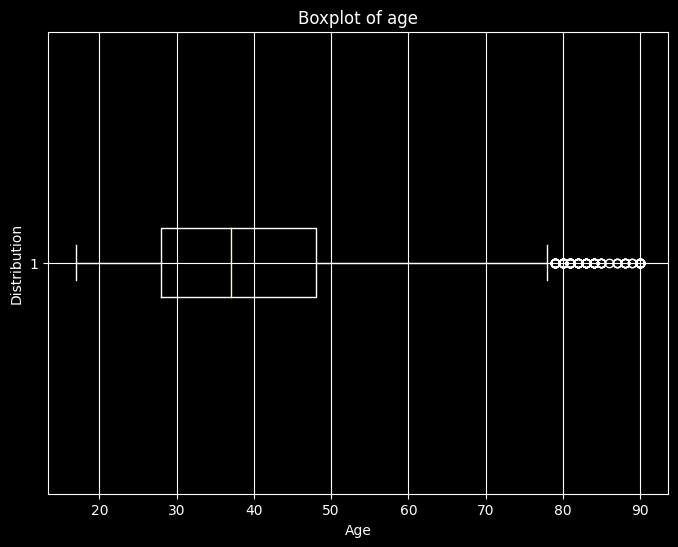

In [537]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_data['age'], vert=False)
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

In [538]:
# Detect outliers in the 'column_name' column
outliers_age = detect_outliers_iqr(X_data, 'age')
outliers_age.shape

(215, 15)

In [539]:
# Drop outliers from the DataFrame
X_data = X_data.drop(outliers_age.index)
X_data.shape

(48574, 15)

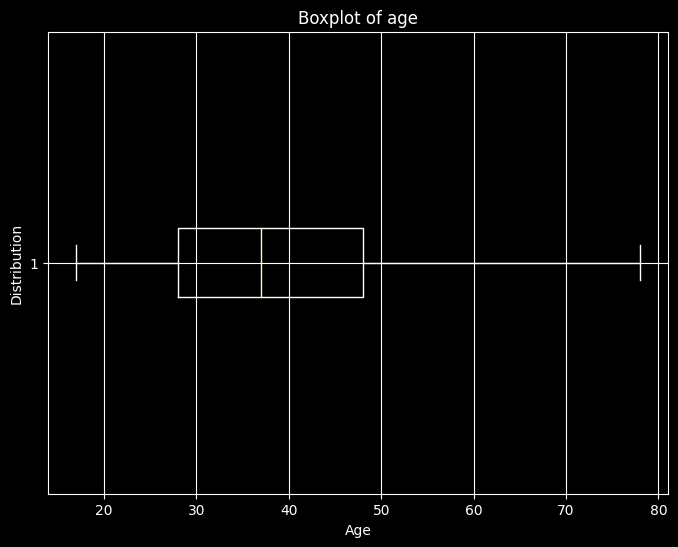

In [540]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_data['age'], vert=False)
plt.title('Boxplot of age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

### Finding outliers for fnlwgt and droping

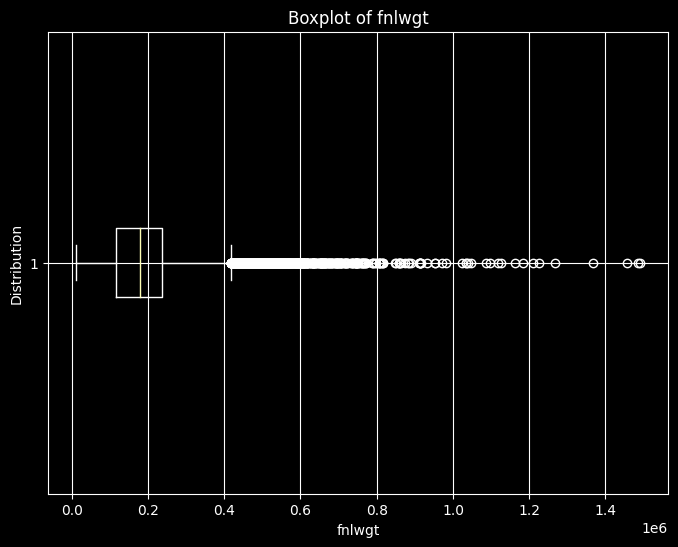

In [541]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_data['fnlwgt'], vert=False)
plt.title('Boxplot of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

In [542]:
# Detect outliers in the 'column_name' column
outliers_fnlwgt = detect_outliers_iqr(X_data, 'fnlwgt')
outliers_fnlwgt.shape

(1452, 15)

In [543]:
# Drop outliers from the DataFrame
X_data = X_data.drop(outliers_fnlwgt.index)
X_data.shape

(47122, 15)

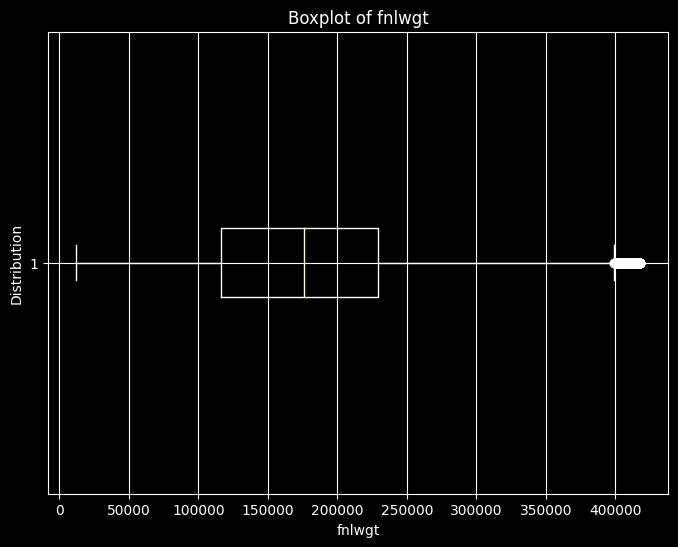

In [544]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_data['fnlwgt'], vert=False)
plt.title('Boxplot of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

### Grouping Values


In [545]:
X_data['workclass'].value_counts()

Private             35368
Self-emp-not-inc     3743
Local-gov            3052
State-gov            1914
Self-emp-inc         1644
Federal-gov          1371
Without-pay            21
Never-worked            9
Name: workclass, dtype: int64

In [546]:
group_workclass = {
    'Private-Sector' : ['Private', 'Self-emp-not-inc', 'Self-emp-inc'],
    'Government-Sector' : ['Local-gov', 'State-gov', 'Federal-gov'],
    'Others' : ['Without-pay', 'Never-worked'],
}

def grouping_workclass(workclass):
  for group, types in group_workclass.items():
    if workclass in types:
      return group
  return "Unkonwn"

X_data['workclass'] = X_data['workclass'].apply(grouping_workclass)

In [547]:
X_data['workclass'].value_counts()

Private-Sector       40755
Government-Sector     6337
Others                  30
Name: workclass, dtype: int64

In [548]:
X_data['marital-status'].value_counts()

Married-civ-spouse       21637
Never-married            15498
Divorced                  6455
Separated                 1474
Widowed                   1423
Married-spouse-absent      601
Married-AF-spouse           34
Name: marital-status, dtype: int64

In [549]:
group_marital_status = {
    'Married' : ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
    'Single' : ['Never-married', 'Divorced', 'Separated', 'Widowed'],
}

def grouping_marital_status(marital_status):
  for group, types in group_marital_status.items():
    if marital_status in types:
      return group
  return "Unkonwn"

X_data['marital-status'] = X_data['marital-status'].apply(grouping_marital_status)

In [550]:
X_data['marital-status'].value_counts()

Single     24850
Married    22272
Name: marital-status, dtype: int64

In [551]:
X_data['relationship'].value_counts()

Husband           19052
Not-in-family     12095
Own-child          7318
Unmarried          4946
Wife               2272
Other-relative     1439
Name: relationship, dtype: int64

In [552]:
X_data.loc[:, 'relationship'].replace('Husband','Partner', regex=True, inplace=True)
X_data.loc[:, 'relationship'].replace('Wife','Partner', regex=True, inplace=True)

In [553]:
X_data['relationship'].value_counts()

Partner           21324
Not-in-family     12095
Own-child          7318
Unmarried          4946
Other-relative     1439
Name: relationship, dtype: int64

In [554]:
X_data['native-country'].value_counts()

United-States                 43212
Mexico                          814
Philippines                     291
Germany                         202
Puerto-Rico                     179
Canada                          176
India                           150
Cuba                            136
El-Salvador                     136
England                         123
China                           122
South                           112
Jamaica                         106
Italy                           103
Dominican-Republic              102
Japan                            88
Vietnam                          86
Poland                           84
Columbia                         83
Haiti                            74
Guatemala                        71
Portugal                         65
Taiwan                           64
Iran                             58
Greece                           48
Ecuador                          44
Nicaragua                        41
Peru                        

In [555]:
group_native_country = {
    'North America': ['United-States', 'Mexico', 'Canada', 'Puerto-Rico', 'Cuba', 'Jamaica', 'Dominican-Republic',
                      'Haiti', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Trinadad&Tobago', 'Honduras'],
    'Asia': ['Philippines', 'India', 'China', 'Japan', 'Taiwan', 'Vietnam', 'Iran', 'Hong', 'Thailand', 'Cambodia',
             'Laos'],
    'Europe': ['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland', 'Scotland', 'Yugoslavia',
               'Hungary', 'Holand-Netherlands'],
    'Latin America': ['El-Salvador', 'Guatemala', 'Columbia', 'Peru', 'Ecuador'],
    'Other': ['South', 'Greece']
}

def grouping_native_country(native_country):
  for group, types in group_native_country.items():
    if native_country in types:
      return group
  return "Unkonwn"

X_data['native-country'] = X_data['native-country'].apply(grouping_native_country)

In [556]:
X_data['native-country'].value_counts()

North America    44908
Asia               970
Europe             712
Latin America      372
Other              160
Name: native-country, dtype: int64

In [557]:
X_data['occupation'].value_counts()

Prof-specialty       8660
Craft-repair         5904
Exec-managerial      5883
Adm-clerical         5432
Sales                5311
Other-service        4737
Machine-op-inspct    2938
Transport-moving     2272
Handlers-cleaners    1973
Farming-fishing      1416
Tech-support         1403
Protective-serv       949
Priv-house-serv       229
Armed-Forces           15
Name: occupation, dtype: int64

In [558]:
group_occupation = {
    'Professionals': ['Prof-specialty', 'Exec-managerial', 'Tech-support'],
    'Crafts and Repair': ['Craft-repair', 'Machine-op-inspct'],
    'Administrative': ['Adm-clerical'],
    'Sales': ['Sales'],
    'Service': ['Other-service', 'Handlers-cleaners', 'Protective-serv', 'Priv-house-serv'],
    'Transportation': ['Transport-moving'],
    'Farming-Fishing': ['Farming-fishing'],
    'Armed-Forces': ['Armed-Forces']
}

def grouping_occupation(occupation):
  for group, types in group_occupation.items():
    if occupation in types:
      return group
  return "Unkonwn"

X_data['occupation'] = X_data['occupation'].apply(grouping_occupation)

In [559]:
X_data['occupation'].value_counts()

Professionals        15946
Crafts and Repair     8842
Service               7888
Administrative        5432
Sales                 5311
Transportation        2272
Farming-Fishing       1416
Armed-Forces            15
Name: occupation, dtype: int64

In [560]:
def grouping_hours_per_week(hours_per_week):
  if 1 <= hours_per_week <= 40:
    return '1-40 Hours'
  elif 40 <= hours_per_week	<= 60:
    return '40-60 Hours'
  elif 60 <= hours_per_week	<= 80:
    return '60-80 Hours'
  elif 80 <= hours_per_week	<= 100:
    return '80-100 Hours'
  else:
    return 'Other'

X_data['hours-per-week'] = X_data['hours-per-week'].apply(grouping_hours_per_week)

In [561]:
X_data['hours-per-week'].value_counts()

1-40 Hours      33171
40-60 Hours     12315
60-80 Hours      1327
80-100 Hours      309
Name: hours-per-week, dtype: int64

In [562]:
def grouping_age(age):
  if 17 <= age <= 19:
    return 'Teenager(13-19)'
  elif 20 <= age <= 29:
    return 'Young Adult(20-29)'
  elif 30 <= age <= 59:
    return 'Adult(30-59)'
  elif 60 <= age <= 90:
    return 'Elder(60-90)'
  else:
    return 'Other'

X_data['age'] = X_data['age'].apply(grouping_age)

In [563]:
X_data['age'].value_counts()

Adult(30-59)          29422
Young Adult(20-29)    11535
Elder(60-90)           3759
Teenager(13-19)        2406
Name: age, dtype: int64

### Correlation between each column and "Income"

In [564]:
X_data_cor = X_data.copy()

In [565]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_data_cor['age'] = label_encoder.fit_transform(X_data_cor['age'])
X_data_cor['workclass'] = label_encoder.fit_transform(X_data_cor['workclass'])
X_data_cor['education'] = label_encoder.fit_transform(X_data_cor['education'])
X_data_cor['marital-status'] = label_encoder.fit_transform(X_data_cor['marital-status'])
X_data_cor['occupation'] = label_encoder.fit_transform(X_data_cor['occupation'])
X_data_cor['relationship'] = label_encoder.fit_transform(X_data_cor['relationship'])
X_data_cor['race'] = label_encoder.fit_transform(X_data_cor['race'])
X_data_cor['sex'] = label_encoder.fit_transform(X_data_cor['sex'])
X_data_cor['hours-per-week'] = label_encoder.fit_transform(X_data_cor['hours-per-week'])
X_data_cor['native-country'] = label_encoder.fit_transform(X_data_cor['native-country'])
X_data_cor['income'] = label_encoder.fit_transform(X_data_cor['income'])

X_data_cor


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,0,77516,9,13,1,0,0,4,1,2174,0,0,3,0
1,0,2,83311,9,13,0,4,3,4,1,0,0,0,3,0
2,0,2,215646,11,9,1,6,0,4,1,0,0,0,3,0
3,0,2,234721,1,7,0,6,3,2,1,0,0,0,3,0
4,3,2,338409,9,13,0,4,3,2,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,2,215419,9,13,1,4,0,4,0,0,0,0,3,0
48838,1,2,321403,11,9,1,4,1,2,1,0,0,0,3,0
48839,0,2,374983,9,13,0,4,3,4,1,0,0,1,3,0
48840,0,2,83891,9,13,1,0,2,1,1,5455,0,0,3,0


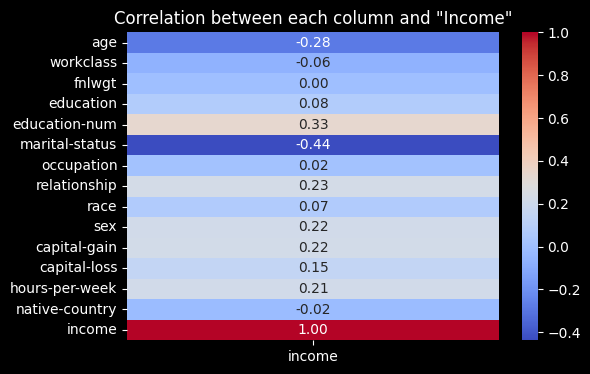

In [566]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_data_cor.corr()

income_cor = correlation_matrix['income']

plt.figure(figsize=(6, 4))
sns.heatmap(income_cor.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()

### Droping fnlwgt because correlation is 0 for all Three NaN values handling

In [567]:
X_data.drop('fnlwgt', axis=1, inplace=True)

## Preparing Data for Naive Bayes

### Gaussian Naive Bayes only Work with numeric values

so using label encoder to change strings to numaric values

In [568]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_data['age'] = label_encoder.fit_transform(X_data['age'])
X_data['workclass'] = label_encoder.fit_transform(X_data['workclass'])
X_data['education'] = label_encoder.fit_transform(X_data['education'])
X_data['marital-status'] = label_encoder.fit_transform(X_data['marital-status'])
X_data['occupation'] = label_encoder.fit_transform(X_data['occupation'])
X_data['relationship'] = label_encoder.fit_transform(X_data['relationship'])
X_data['race'] = label_encoder.fit_transform(X_data['race'])
X_data['hours-per-week'] = label_encoder.fit_transform(X_data['hours-per-week'])
X_data['sex'] = label_encoder.fit_transform(X_data['sex'])
X_data['capital-gain'] = label_encoder.fit_transform(X_data['capital-gain'])
X_data['capital-loss'] = label_encoder.fit_transform(X_data['capital-loss'])
X_data['native-country'] = label_encoder.fit_transform(X_data['native-country'])

X_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,0,9,13,1,0,0,4,1,27,0,0,3,<=50K
1,0,2,9,13,0,4,3,4,1,0,0,0,3,<=50K
2,0,2,11,9,1,6,0,4,1,0,0,0,3,<=50K
3,0,2,1,7,0,6,3,2,1,0,0,0,3,<=50K
4,3,2,9,13,0,4,3,2,0,0,0,0,3,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,2,9,13,1,4,0,4,0,0,0,0,3,<=50K
48838,1,2,11,9,1,4,1,2,1,0,0,0,3,<=50K
48839,0,2,9,13,0,4,3,4,1,0,0,1,3,<=50K
48840,0,2,9,13,1,0,2,1,1,82,0,0,3,<=50K


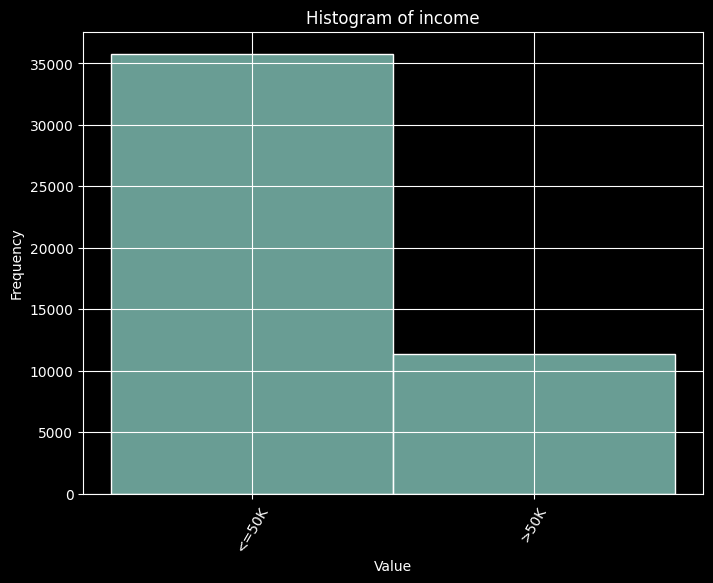

In [569]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.histplot(data=X_data, x="income")
plt.title('Histogram of income')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

### Balancing Income in the Dataset

In [570]:
from imblearn.over_sampling import SMOTE

y_data = X_data["income"]
X_data = X_data.drop("income", axis=1)

smote = SMOTE(random_state=42)

x_resampled, y_resampled = smote.fit_resample(X_data, y_data)

x_resampled.shape

(71574, 13)

In [571]:
y_resampled.shape

(71574,)

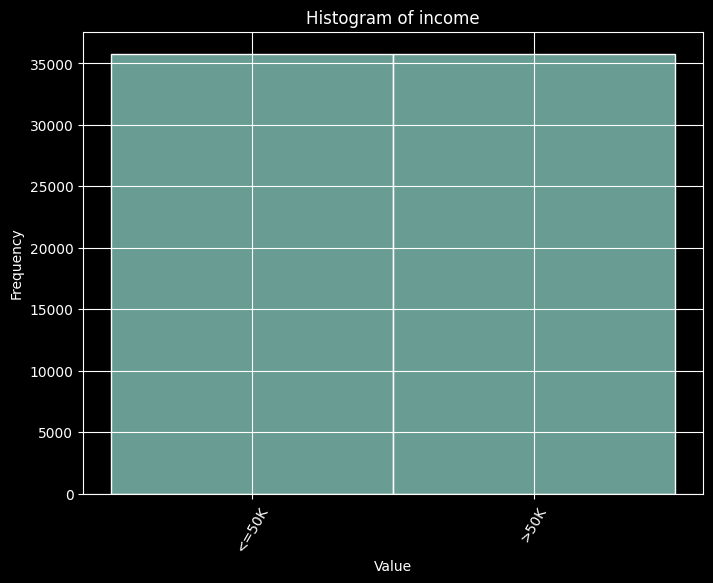

In [572]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.histplot(data=y_resampled)
plt.title('Histogram of income')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

In [573]:
y_resampled

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
71569     >50K
71570     >50K
71571     >50K
71572     >50K
71573     >50K
Name: income, Length: 71574, dtype: object

test_size = 0.2 means 20% of the data will be tested while 80% of the data will be trained

In [574]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

# Gaussian Naive Bayes

In [575]:
from sklearn.naive_bayes import GaussianNB
g_nav_bay = GaussianNB()
g_nav_bay.fit(x_train,y_train)
y_prediction_g_nav_bay = g_nav_bay.predict(x_test)

In [576]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction_g_nav_bay))

              precision    recall  f1-score   support

       <=50K       0.79      0.80      0.79      7107
        >50K       0.80      0.79      0.79      7208

    accuracy                           0.79     14315
   macro avg       0.79      0.79      0.79     14315
weighted avg       0.79      0.79      0.79     14315



In [577]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction_g_nav_bay)*100)

79.42717429269996


In [578]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_prediction_g_nav_bay)

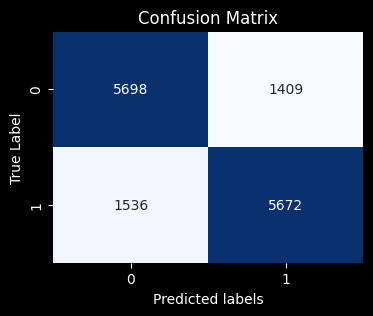

In [579]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [580]:
from sklearn.ensemble import RandomForestClassifier

ran_fo = RandomForestClassifier()

model = ran_fo.fit(x_train, y_train)
prediction_ran_fo = model.predict(x_test)

print("Accuracy training data : ", ran_fo.score(x_train, y_train))
print("Accuracy testing data : ", ran_fo.score(x_test, y_test))

Accuracy training data :  0.8713215389720393
Accuracy testing data :  0.8498777506112469


In [581]:
print(classification_report(y_test, prediction_ran_fo))

              precision    recall  f1-score   support

       <=50K       0.88      0.81      0.84      7107
        >50K       0.82      0.89      0.86      7208

    accuracy                           0.85     14315
   macro avg       0.85      0.85      0.85     14315
weighted avg       0.85      0.85      0.85     14315



In [582]:
print(accuracy_score(y_test, prediction_ran_fo)*100)

84.9877750611247


In [583]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction_ran_fo)

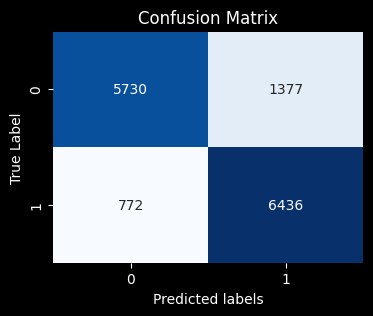

In [584]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Handle outliers and group the datas



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix


# Precision-Recall Curve
precision_model1, recall_model1, _ = precision_recall_curve(true_labels, predictions_model1)
precision_model2, recall_model2, _ = precision_recall_curve(true_labels, predictions_model2)

plt.plot(recall_model1, precision_model1, label='Model 1')
plt.plot(recall_model2, precision_model2, label='Model 2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Example classification report
report = classification_report(y_test, y_prediction_gnb, output_dict=True)

# Extract F1 scores from the report
f1_scores = [report[label]['f1-score'] for label in report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Plot F1 scores
plt.bar(range(len(f1_scores)), f1_scores, color='blue')
plt.xlabel('Class Labels')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.xticks(np.arange(len(f1_scores)), report.keys(), rotation=45)
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()



